# Happiness Within Countries

#### Iris Truong, Jason Zhong, Yun Qi

## INTRODUCTION

Humans are complex beings and hard to gauge how things are going. As so, happiness is also a hard aspect to gauge with data. The welfare of humanity is an important aspect that we should care about. This is especially important to world organizations like the WHO and the UN. The UN even has a <a href= https://www.un.org/en/observances/happiness-day>day</a> dedicated celebrating the happiness in the culture of people around the world. There have been independent researches done by the <a href= https://worldhappiness.report/archive/>World Happiness Report</a> on how happy people are in the world. In the <a href= https://worldhappiness.report/ed/2020/>2020</a>  report, the WHR discusses in detail what categories they used to group the variables. It discusses how the environment affects the happiness of the population, especially different social environments like connections and institutions in its country. The report then continues to discuss the differences in happiness in urban areas compared to other places. The report is an interesting analysis of what determines happiness for people around the world and bring it to an analytic point of view.

In this tutorial, we will be using this <a href= https://www.kaggle.com/mathurinache/world-happiness-report>dataset</a> from Kaggle which was gathered from the WHR. Our goal is to tidy up the data given to us and provide insight what the data tells us. We would like to see if there is a formula that would tell us how effective a each variable is in affect the happiness of people. In addition, using the data we could see any continuity of how the world changes overtime as people may value certain factors over the years. There could be other groupings we could look at like different regions might value happiness or whether first and third world countries have different values. Finally, with the given results we could compare the results with other analysis on happiness and see if there any difference between the analysis. We hope to show the progression of humanity as time goes on, the measure of happiness would shift to something else as more technology becomes avaliable and different philosophy rises. Hopefully we can teach people about how different countries sees happiness.

## 1. DATA COLLECTION

Using Python3 we will import some libraries to help with the data munging, analysis, and visual representation. The libraries imported are <a href= https://pandas.pydata.org/>pandas</a> as pd for orginizing the data, <a href= https://matplotlib.org/contents.html>matplotlib.pyplot</a> as plt and <a href= https://seaborn.pydata.org/introduction.html>seaborn</a> as sns for visualizations, <a href= https://numpy.org/doc/stable/user/>numpy</a> as np for math operation, <a href= https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>sklearn Linear Regression</a> for training the linear regression model, <a href=https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html>sklearn Polynomial Features</a> for generating polynomial and interaction features in regression model, <a href=https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html>R Squared Score</a> and <a href=https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html>Mean Squared Error</a> for evaluating regression model accuracy.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

Before the data can be used to we have to import it into the notebook and clean up the data so then it can be managable, easier to represent, and help withe the analysis. So we downloaded the files from the website and put it into the github repository in a so then we can read from them. Then using pandas csv reader we were able to read the files and put them into pandas dataframes.

In [2]:
data2015 = pd.read_csv("2015")
data2016 = pd.read_csv("2016")
data2017 = pd.read_csv("2017")
data2018 = pd.read_csv("2018")
data2019 = pd.read_csv("2019")
data2020 = pd.read_csv("2020")

## 2. DATA PROCESSING

The data collected by the WHR differed from year to year as they gathered information that they thought was important to the research they were doing and some columns were renamed. For example in the 2015 data, there is a feature called family while in 2020 family was replaced with social support. The columns of each dataset are named differently but represents the same informations. For example "Freedom" for one year could be "Explained by: Freedom to make life choices" in another year. So these columns would have to be renamed so it would be easier to merge the datasets into one big set.

In [3]:
data2020['Happiness Rank'] =  range(1, len(data2020.index)+1)
data2020['Year'] = 2020

In [4]:
# Drop the extraneous generosity so that concat can work later on in the code
data2020 = data2020.drop(['Generosity'], axis = 1)

data2020 = data2020.rename(columns = {'Country name' : 'Country', 'Regional indicator': 'Region', 'Ladder score' : 'Happiness Score', 
                        'Explained by: Log GDP per capita' : 'Economy (GDP per Capita)', 'Explained by: Social support' : 'Family', 
                                    'Explained by: Healthy life expectancy' : 'Health (Life Expectancy)',
                        'Explained by: Freedom to make life choices' : 'Freedom', 
                                    'Explained by: Perceptions of corruption' : 'Trust (Government Corruption)',
                                      'Explained by: Generosity' : 'Generosity',
                                     'Standard error of ladder score' : 'Standard Error', 'Regional indicator' : 'Region'})

In [5]:
#Just renaming some regions in 2020 as they changed some regions around. Commonwealth of Independent States are all
#Central and Eastern European countries. The Asian regions the report decided to use the noun versions of the
#cardinal directions rather the adjectives.
data2020['Region'] = data2020['Region'].replace(['Commonwealth of Independent States'],'Central and Eastern Europe')
data2020['Region'] = data2020['Region'].replace(['South Asia'],'Southern Asia')
data2020['Region'] = data2020['Region'].replace(['Southeast Asia'],'Southeastern Asia')
data2020['Region'] = data2020['Region'].replace(['East Asia'],'Eastern Asia')
data2020['Region'] = data2020['Region'].replace(['Middle East and North Africa'],'Middle East and Northern Africa')

In [6]:
#Split North America regions from Australia and New Zealand
for i, row in data2020.loc[data2020['Region'] == 'North America and ANZ'].iterrows():
    if row['Country'] == 'United States' or row['Country'] == 'Canada':
        data2020.at[i,'Region'] = 'North America'
    else:
        data2020.at[i,'Region'] = 'Australia and New Zealand'

In [7]:
data2020

,Country,Region,Happiness Score,Standard Error,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia + residual,Happiness Rank,Year
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,1,2020
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2,2020
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,3,2020
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,4,2020
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,149,2020
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,150,2020
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,151,2020
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,...,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,152,2020


In [8]:
# temp is just a table for the merge to be conducted on to match countries with their regions
temp = data2016[['Country','Region']]

In [9]:
data2019 = data2019.rename(columns = {'Overall rank' : 'Happiness Rank', 'Country or region' : 'Country', 
                                      'Score' : 'Happiness Score', 'GDP per capita' : 'Economy (GDP per Capita)',
                                      'Social support': 'Family', 'Healthy life expectancy' : 'Health (Life Expectancy)',
                                      'Freedom to make life choices':'Freedom','Perceptions of corruption' : 'Trust (Government Corruption)'})
#Matches the countries with their repective regions
data2019 = pd.merge(data2019, temp, how='left', on=['Country'])
data2019['Year'] = 2019
data2019

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe,2019
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Sub-Saharan Africa,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Sub-Saharan Africa,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Southern Asia,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,NaN,2019


In [10]:
data2018 = data2018.rename(columns = {'Happiness.Rank' : 'Happiness Rank', 'Country or region':'Country', 'Overall rank':'Happiness Rank',
                                      'Score' : 'Happiness Score', 'GDP per capita' : 'Economy (GDP per Capita)',
                                      'Social support': 'Family', 'Healthy life expectancy' : 'Health (Life Expectancy)',
                                      'Freedom to make life choices':'Freedom','Perceptions of corruption' : 'Trust (Government Corruption)'})
data2018 = pd.merge(data2018, temp, how='left', on=['Country'])
data2018['Year'] = 2018
data2018

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Western Europe,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,Western Europe,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,Western Europe,2018
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,Middle East and Northern Africa,2018
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,Sub-Saharan Africa,2018
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,Sub-Saharan Africa,2018
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,NaN,2018


In [11]:
data2017 = data2017.rename(columns = {'Happiness.Rank' : 'Happiness Rank', 'Country or region' : 'Country', 
                                      'Happiness.Score' : 'Happiness Score', 'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)',
                                      'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                                      'Freedom to make life choices':'Freedom','Trust..Government.Corruption.' : 'Trust (Government Corruption)'})
data2017 = pd.merge(data2017, temp, how='left', on=['Country']).dropna()
data2017['Year'] = 2017
data2017

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia.Residual,Region,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Togo,150,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,Sub-Saharan Africa,2017
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,Sub-Saharan Africa,2017
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,Middle East and Northern Africa,2017
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,Sub-Saharan Africa,2017


In [12]:
data2016['Year'] = 2016
data2015['Year'] = 2015

In [13]:
data2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [14]:
data2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


The dataAll contains a concatenation of all 6 years. The dropna was used to drop and pieces of data that contained any missing values, specifically missing values in the region column as it is a categorical data, we cannot extrapolate data because we do not know what WHR's standards are for placing countries into different regions.

In [15]:
dataAll = pd.concat([data2020,data2019,data2018,data2017,data2016,data2015])
dataAll=dataAll[['Country','Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                   'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
                                   'Generosity', 'Year',]].dropna()
dataAll

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Finland,Western Europe,1,7.8087,1.285190,1.499526,0.961271,0.662317,0.477857,0.159670,2020
1,Denmark,Western Europe,2,7.6456,1.326949,1.503449,0.979333,0.665040,0.495260,0.242793,2020
2,Switzerland,Western Europe,3,7.5599,1.390774,1.472403,1.040533,0.628954,0.407946,0.269056,2020
3,Iceland,Western Europe,4,7.5045,1.326502,1.547567,1.000843,0.661981,0.144541,0.362330,2020
4,Norway,Western Europe,5,7.4880,1.424207,1.495173,1.008072,0.670201,0.434101,0.287985,2020
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.4650,0.222080,0.773700,0.428640,0.592010,0.551910,0.226280,2015
154,Benin,Sub-Saharan Africa,155,3.3400,0.286650,0.353860,0.319100,0.484500,0.080100,0.182600,2015
155,Syria,Middle East and Northern Africa,156,3.0060,0.663200,0.474890,0.721930,0.156840,0.189060,0.471790,2015
156,Burundi,Sub-Saharan Africa,157,2.9050,0.015300,0.415870,0.223960,0.118500,0.100620,0.197270,2015


For the meaing of each column/variable refer to the index <a href= https://happiness-report.s3.amazonaws.com/2020/WHR20_Ch2_Statistical_Appendix.pdf>here</a>. The first two pages explain what the report asked in their survey and how it converted the information to numbers.

## 3. EXPLORATORY ANALYSIS AND DATA VISUALIZATION:

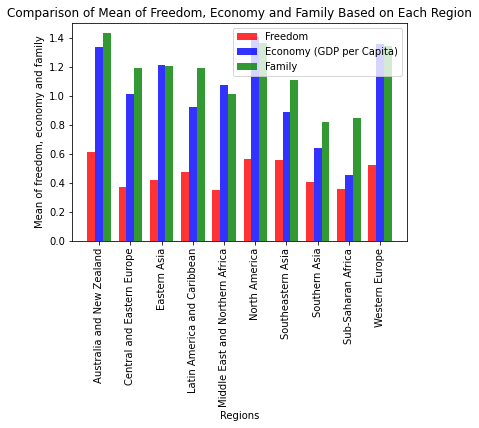

In [16]:
# data to plot
n_groups = 10
economy = dataAll.groupby("Region")["Economy (GDP per Capita)"].mean()
fam = dataAll.groupby("Region")["Family"].mean()
free = dataAll.groupby("Region")["Freedom"].mean()

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index - bar_width, free, bar_width, 
alpha=opacity,
color='r',
label='Freedom',
align='center')


rects2 = plt.bar(index, economy, bar_width, 
alpha=opacity,
color='b',
label='Economy (GDP per Capita)',
align='center')


rects3 = plt.bar(index + bar_width, fam, bar_width, 
alpha=opacity,
color='g',
label='Family',
align='center')




plt.xlabel('Regions')
plt.ylabel('Mean of freedom, economy and family')
plt.title('Comparison of Mean of Freedom, Economy and Family Based on Each Region')
plt.xticks(index, ('Australia and New Zealand', 'Central and Eastern Europe', 'Eastern Asia', 'Latin America and Caribbean', 'Middle East and Northern Africa', 'North America', 'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa', 'Western Europe'))
plt.xticks(rotation=90)

#create a key
plt.legend()
plt.show()

This is a bar graph showing the mean of each region's freedom, economy and family score. I chose to analyze the mean because analyzing the cumulative score of each region would be an incurrate analysis of what region haas the highest score. This is because the number of countries in each region are different so countries with more regions would seem to have a higher score when in reality, there are just more scores instead of higher scores.

Based off the graph, we can see that Central and Eastern Europe, Middle East and Northern Africa and Sub-Saharan Africa have the lowest freedom scores while Australia and New Zealand have the highest freedom scores. Looking at the economy, Sub-Saharan Africa has the lowest while North America has the highest. Additionally, Australia and New Zealand has the highest family score and Southern Asia and Sub-Saharan Africa have the lowest family scores. 

As a whole, it seems like Sub-Saharan Africa consistently has one of the lowest scores in each of the three categories while North America and Australia and New Zealand have the highest scores in the three categories. Western Europe also has high scores in all three categories, although not the highest.



In [17]:
!pip install folium
import folium
import requests
import pandas
import numpy as np

mapp = folium.Map(zoom_start=20)
tab = ['Australia and New Zealand', 'Central and Eastern Europe', 'Eastern Asia', 'Latin America and Caribbean', 'Middle East and Northern Africa', 'North America', 'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa', 'Western Europe']

happiness = dataAll.groupby("Region")["Happiness Score"].mean()

for i in tab:
    if i == 'Western Europe':
        radius = happiness.loc[i]
        long = 46.2022
        lat = 1.2644
        color = 'Orange'
    
    elif i == 'North America':
        radius = happiness.loc[i]
        long = 54.5260
        lat = -105.2551
        color = 'Blue'
       
    elif i == 'Australia and New Zealand':
        radius = happiness.loc[i]
        long = -40.9006
        lat = 174.8860
        color = 'Green'
       
    elif i == 'Middle East and Northern Africa':
        radius = happiness.loc[i] 
        long = 29.2985
        lat = 42.5510
        color = 'Red'
        
    elif i == 'Latin America and Caribbean':
        radius = happiness.loc[i]
        long = 21.4691
        lat = -78.6569
        color = 'Pink'
        
    elif i == 'Southeastern Asia':
        radius = happiness.loc[i]
        long = -2.2180
        lat = 115.6628
        color = 'Purple'
        
    elif i == 'Central and Eastern Europe':
        radius = happiness.loc[i]
        long = 52.0055
        lat = 37.9587
        color = 'Gray'
       
    elif i == 'Eastern Asia':
        radius = happiness.loc[i]
        long = 38.7946
        lat = 106.5348
        color = 'Yellow'
        
    elif i == 'Sub-Saharan Africa':
        radius = happiness.loc[i] 
        long = -23.806078
        lat = 11.288452
        color = 'Cyan'
        
    elif i == 'Southern Asia':
        radius = happiness.loc[i] 
        long = 25.0376
        lat = 76.4563
        color = 'Black'
        
    else:
        continue
    folium.CircleMarker(
    location=[long, lat],
    #so that radius is visible
    radius = radius*2,
    tooltip = i,
    popup = radius,
    color = color,
    fill = True, 
).add_to(mapp)

mapp

I used a map to analyze the mean of each region's happiness score (I chose the mean to take into consideration the number of countries in each region). I first found each region's longitude and latitude on Google so that I could map it on the map. I made the radius of each circle the mean of their respective region's happiness score so that it is easier to visualize which regions have the highest and which have the lowest scores. I also enabled the popup feature so that the user can click to see the region's score. 

From this visualization, North America and Australia and New Zealand have the highest average happiness score, with the latter have a slightly higher score when clicking on the circle. Sub-Saharan Africa has an evidently smaller circle than the other regions, meaning it has the smallest happiness score.

Combining the analysis of both visualizations, it can be seen that Sub-Saharan Africa has the lowest scores in both analyses and Australia and New Zealand and North America with the highest scores. From this, I conclude that the factors (family, freedom, economy) all play a role in each region's happiness score. 


In [18]:
## 4. ANALYSIS, MACHING LEARNING, AND HYPOTHESIS TESTING:¶

We would like to predict the Happiness Score based on other variables in the dataset. The first question we want to answer is: "How has happiness score changed over years?" In order to answer that question, we plot the Distribution of happiness score over years using <a href= https://matplotlib.org/contents.html>plt</a> and <a href= https://seaborn.pydata.org/introduction.html>sns</a>

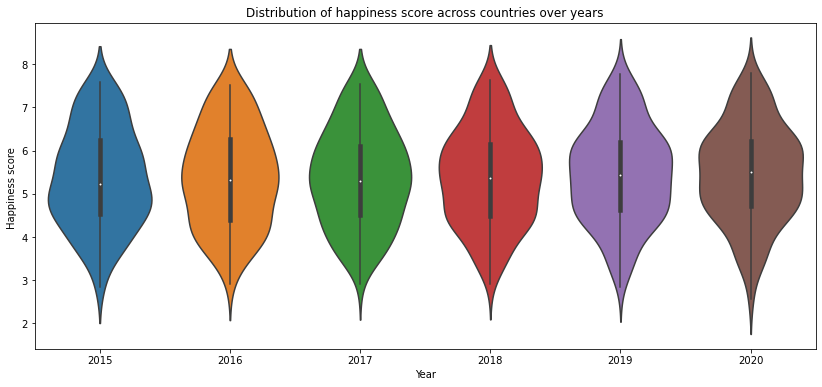

In [19]:
#Plot the happiness score distribution
plt.figure(figsize=(14,6)) #Format figure size
sns.violinplot(x='Year', y='Happiness Score', data=dataAll).set( xlabel="Year", ylabel="Happiness score ")
plt.title("Distribution of happiness score across countries over years")

# Show the plot
plt.show()

The ranges of Happiness Score are quite similar (from ~2 to ~8.5) for different years. The distributions of Happiness Score are quite symmetric, but not normal. Expecially, in 2018, 2019, and 2020, the distributions tend to have bimodal shapes.

It's quite hard to see the trend of mean Happiness Score from this plot because the changes of mean Happiness Score over years are very small as compared to the range of Happiness Score.

We would like to have a separate plot to see the differences in mean Happiness Score over years more easily.

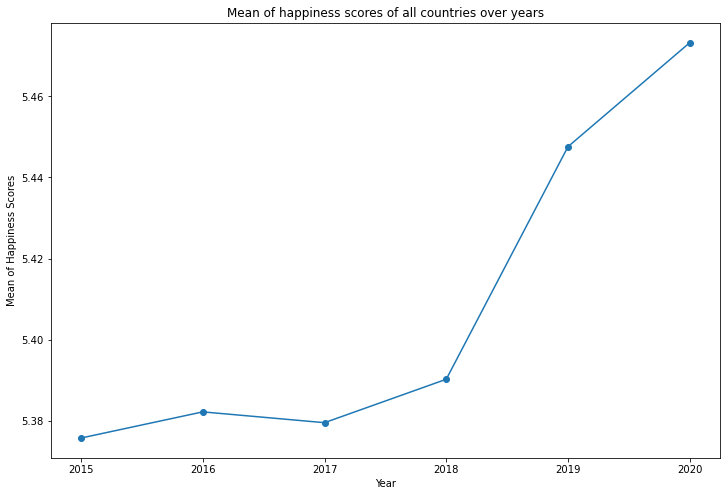

In [20]:
# Get mean of happiness score in all countries over years
mean_happiness_score_by_year_df = dataAll \
                                .groupby("Year")["Happiness Score"] \
                                .mean()

# Plot Mean of happiness scores of all countries over years
plt.figure(figsize=(12,8))
mean_happiness_score_by_year_df.plot (
    x="Year", y="Happiness Score",
    kind="line", marker="o",
    title="Mean of happiness scores of all countries over years",
    xlabel="Year", ylabel="Mean of Happiness Scores"
)

# Show the result
plt.show()

Similarly, we calculate the standard deviation of Happiness Score across years, and plot the result

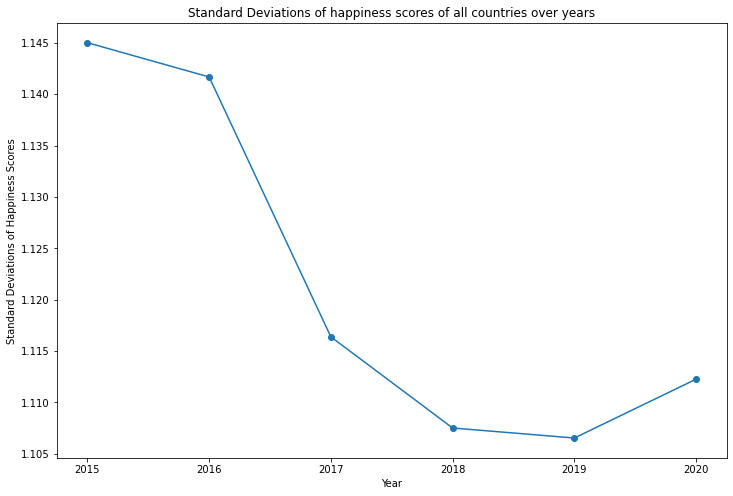

In [21]:
# Get stddev of happiness score in all countries over years
std_happiness_score_by_year_df = dataAll \
                                .groupby("Year")["Happiness Score"] \
                                .std()

# Plot Standard Deviations of happiness scores of all countries over years
plt.figure(figsize=(12,8))
std_happiness_score_by_year_df.plot (
    x="Year", y="Happiness Score",
    kind="line", marker="o",
    title="Standard Deviations of happiness scores of all countries over years",
    xlabel="Year", ylabel="Standard Deviations of Happiness Scores"
)

# Show the result
plt.show()

The mean of Happiness Score fluctuated in the 2015-2017 period but has increased since 2018, meaning that people are getting happier over times. It's also interesting that the standard deviation of Happiness Score had a decreasing trend in the 2015-2019 period, meaning that the happiness has been spreaded more evenly around the world.

### MODEL 1: PREDICT HAPPINESS SCORE BASED ON YEAR

Although mean of Happiness Score has an increasing trend, the increasing factor is not significant as compared to the Happiness Score range. As we are unsure about the relationship between year and Happiness Score, we will use linear regression model to predict the Happiness Score based on Year, and use the <a href=https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html>R Squared Score</a> as well as <a href=https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html>Mean Squared Error</a> to evaluate the prediction accuracy.


Mean squared error: 1.25
R squared score: 0.00
       Year  Intercept
0  0.019734 -34.404176
Regression line:
	Happiness Score = -34.404175810438126 + Year * 0.019733564289423727 



<Figure size 1008x432 with 0 Axes>

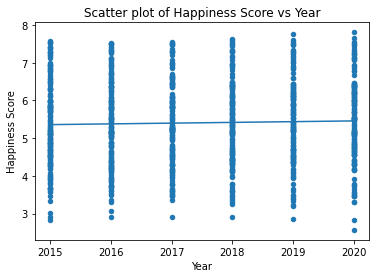

In [22]:
def linear_reg (features_X, happiness_Y, feature_name):
    # Linear Regression
    regr = LinearRegression()
    regr.fit(features_X, happiness_Y)
    
    # Get predicted value
    happiness_Y_predict = regr.predict(features_X)

    # Print mean squared error & R^2 score:
    print()
    print('Mean squared error: %.2f'
          % mean_squared_error(happiness_Y, happiness_Y_predict))
    print('R squared score: %.2f'
          % r2_score(happiness_Y, happiness_Y_predict))
    
    # Print parameters
    params_df = pd.DataFrame([regr.coef_],
                            columns = feature_name)
    params_df["Intercept"] = regr.intercept_
    print(params_df)
    

    #Return happiness_Y_predict, coefficient, interception
    return happiness_Y_predict, regr.coef_, regr.intercept_

#### MODEL 1: PREDICT HAPPINESS SCORE BASED ON YEAR #####
# Get X and Y axes
year_X = dataAll['Year'].to_numpy().reshape(-1, 1)
happiness_Y = dataAll['Happiness Score']

# Linear regression
happiness_Y_predict, coeff, intercept = linear_reg(year_X, happiness_Y, ["Year"])

# Regression Line
print(f'Regression line:\n\tHappiness Score = {intercept} + Year * {coeff[0]} \n', )

# Add the residual column to dataAll
dataAll['Happiness Residual 1'] = happiness_Y_predict - happiness_Y


# Plot the regression model (Happiness Score Vs. Year)
plt.figure(figsize=(14,6)) #Format figure size
ax = dataAll.plot.scatter(x='Year', y='Happiness Score')
ax.set_title("Scatter plot of Happiness Score vs Year")
ax.set_xlabel("Year")
ax.set_ylabel("Happiness Score")
plt.plot(dataAll['Year'], coeff[0] * dataAll['Year'] + intercept)
plt.show()

Scope for the linear regression line is 0.0197, which shows that the relationship between Year and Happiness Score is weak. Also, since R-Squared Error is 0.0 (which is not close to 1), and Mean Squared Error is 1.25 (Which is quite high as the Happiness Score is in range from ~2 to ~8.5), Year is not a good predictor for Happiness Score.

Let's take a look at the Residual Plot of the above Linear Regression Model (Happiness Score Vs. Year)

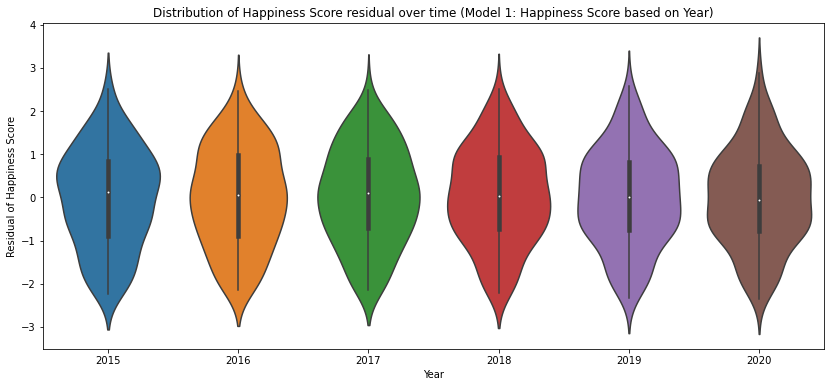

In [23]:
#Plot the residual distribution of Happiness Score over years
plt.figure(figsize=(14,6)) #Format figure size
sns.violinplot(x='Year', y='Happiness Residual 1', data=dataAll) \
    .set( xlabel="Year", ylabel="Residual of Happiness Score")
plt.title("Distribution of Happiness Score residual over time (Model 1: Happiness Score based on Year)")

# Show the plot
plt.show()


Although means of residuals are around 0, the distributions of residuals are not normal. This, again, confirms that Year is not a good predictor for Happiness Score.



Now we need to choose another factor to be a predictor for Happiness Score. We believe that Happiness Score varies by regions. For example, people might feel happier when they live in a region that has a high living standard; on the other hand, people could feel less happy when they live in a region that is politically instable.

In order to verify our assumption, we plot Happiness Score in different regions and different years to see the differences in Happiness Score with respected to Year and with respected to Region. As Happiness Score varies in each region, we calculate the mean of Happiness Score in each region for each year and plot these mean values.

<Figure size 432x288 with 0 Axes>

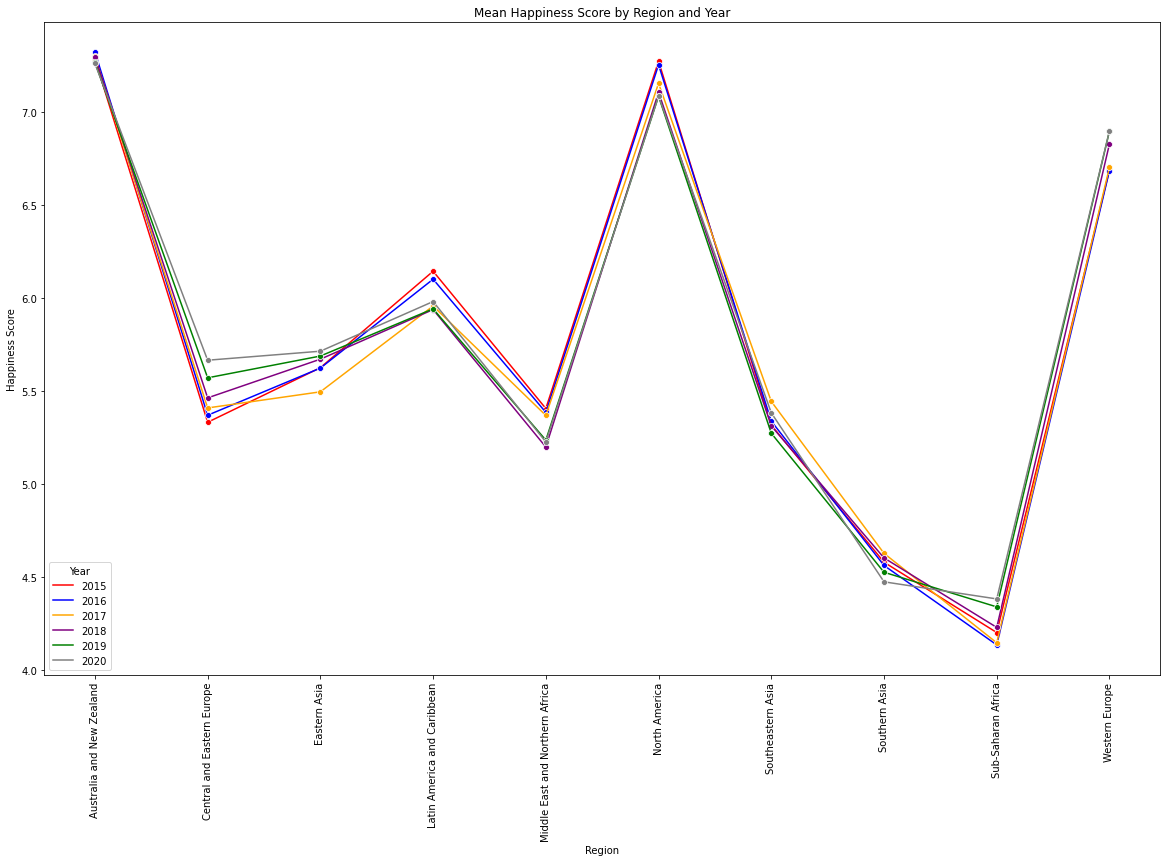

<Figure size 432x288 with 0 Axes>

In [24]:
# Get means of happiness score by year and region
mean_score_yr_region = dataAll.groupby(["Year", "Region"])["Happiness Score"].mean()

# Create a dataframe
frame = { 'Happiness Score': mean_score_yr_region }
mean_score_yr_region_df = pd.DataFrame(frame)

# Plot the mean of happiness score over years accross regions
plt.figure(figsize=(20,12))
ax = sns.lineplot(data=mean_score_yr_region_df,
                x='Region', y='Happiness Score',
                hue='Year', marker="o",
                palette=["red", "blue", "orange", "purple", "green", "gray" ])
plt.xticks(rotation=90) #Make x labels vertical
plt.xlabel("Region")
plt.title("Mean Happiness Score by Region and Year")
plt.figure()

As can be observed from the above plot, Happiness Score does significantly vary by regions. Australia and New Zealand, North America, and Western Europe are the regions that have the highest Happiness Score. This matches with our assumption that people living in high-living-standard regions tend to feel happier than others. Southern Asia and Sub-Saharan Africa are the regions that have the smallest Happiness Scores. One explanation can be that, many countries in Southern Asia and Sub-Saharan Africa are either economically insufficient or politically instable.

Plotting the mean Happiness Score by Year and by Region also allows us to compare the effect of Year on Happiness Score and the effect of Region on Happiness Score. In the above plot, it's hard to distinguish the Happiness Score between years, while it's easy to distinguish the Happiness Score between regions. This means that Happiness Score is more likely to be dependent on Region than to Year.

### MODEL 2: PREDICT HAPPINESS SCORE BASED ON REGION

Since "Region" is a categorical varible, we make dummy binary variables to represent it in the Linear Regression Model. There are 10 different values for column "Region" of the dataset.
    + Australia and New Zealand
    + Central and Eastern Europe
    + Eastern Asia
    + Latin America and Caribbean
    + Middle East and Northern Africa
    + North America
    + Southeastern Asia
    + Southern Asia
    + Sub-Saharan Africa
    + Western Europe
corresponding to 10 dummy variables that we will create. The names of 10 dummy variables are similar to the values of the "Region" column.

For example, if the value of column "Region" of a country is "Australia and New Zealand", the value of column "Australia and New Zealand" of that country will be 1, the value of column "Central and Eastern Europe" will be 0, the value of other dummy-variable columns will also be 0.

In [25]:
### Function to assign values for dummy variables that represent region
def label_continent(row, region):
    if row['Region'] == region:
        return 1
    else:
        return 0
    
#Add new columns for regions
dataAll['Australia and New Zealand'] = dataAll.apply (lambda row: label_continent(row,'Australia and New Zealand'), axis=1)
dataAll['Central and Eastern Europe'] = dataAll.apply (lambda row: label_continent(row,'Central and Eastern Europe'), axis=1)
dataAll['Eastern Asia'] = dataAll.apply (lambda row: label_continent(row,'Eastern Asia'), axis=1)
dataAll['Latin America and Caribbean'] = dataAll.apply (lambda row: label_continent(row,'Latin America and Caribbean'), axis=1)
dataAll['Middle East and Northern Africa'] = dataAll.apply (lambda row: label_continent(row,'Middle East and Northern Africa'), axis=1)
dataAll['North America'] = dataAll.apply (lambda row: label_continent(row,'North America'), axis=1)
dataAll['Southeastern Asia'] = dataAll.apply (lambda row: label_continent(row,'Southeastern Asia'), axis=1)
dataAll['Southern Asia'] = dataAll.apply (lambda row: label_continent(row,'Southern Asia'), axis=1)
dataAll['Sub-Saharan Africa'] = dataAll.apply (lambda row: label_continent(row,'Sub-Saharan Africa'), axis=1)
dataAll['Western Europe'] = dataAll.apply (lambda row: label_continent(row,'Western Europe'), axis=1)

dataAll


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,Finland,Western Europe,1,7.8087,1.285190,1.499526,0.961271,0.662317,0.477857,0.159670,...,0,0,0,0,0,0,0,0,0,1
1,Denmark,Western Europe,2,7.6456,1.326949,1.503449,0.979333,0.665040,0.495260,0.242793,...,0,0,0,0,0,0,0,0,0,1
2,Switzerland,Western Europe,3,7.5599,1.390774,1.472403,1.040533,0.628954,0.407946,0.269056,...,0,0,0,0,0,0,0,0,0,1
3,Iceland,Western Europe,4,7.5045,1.326502,1.547567,1.000843,0.661981,0.144541,0.362330,...,0,0,0,0,0,0,0,0,0,1
4,Norway,Western Europe,5,7.4880,1.424207,1.495173,1.008072,0.670201,0.434101,0.287985,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.4650,0.222080,0.773700,0.428640,0.592010,0.551910,0.226280,...,0,0,0,0,0,0,0,0,1,0
154,Benin,Sub-Saharan Africa,155,3.3400,0.286650,0.353860,0.319100,0.484500,0.080100,0.182600,...,0,0,0,0,0,0,0,0,1,0
155,Syria,Middle East and Northern Africa,156,3.0060,0.663200,0.474890,0.721930,0.156840,0.189060,0.471790,...,0,0,0,0,1,0,0,0,0,0
156,Burundi,Sub-Saharan Africa,157,2.9050,0.015300,0.415870,0.223960,0.118500,0.100620,0.197270,...,0,0,0,0,0,0,0,0,1,0



Mean squared error: 0.49
R squared score: 0.61
   Australia and New Zealand  Central and Eastern Europe  Eastern Asia  \
0               1.543091e+13                1.543091e+13  1.543091e+13   

   Latin America and Caribbean  Middle East and Northern Africa  \
0                 1.543091e+13                     1.543091e+13   

   North America  Southeastern Asia  Southern Asia  Sub-Saharan Africa  \
0   1.543091e+13       1.543091e+13   1.543091e+13        1.543091e+13   

   Western Europe     Intercept  
0    1.543091e+13 -1.543091e+13  


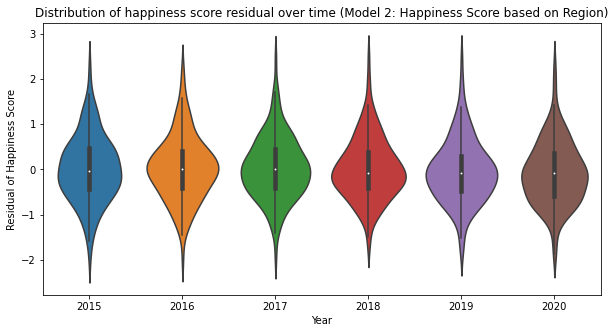

In [26]:
#### MODEL 2: PREDICT HAPPINESS SCORE BASED ON REGION #####

feature_names = ['Australia and New Zealand', 'Central and Eastern Europe', 'Eastern Asia', 'Latin America and Caribbean', \
             'Middle East and Northern Africa', 'North America', 'Southeastern Asia', 'Southern Asia', \
             'Sub-Saharan Africa', 'Western Europe']

# Get data of independent variables and dependent variable
region_X = dataAll[feature_names]
happiness_Y = dataAll['Happiness Score']

#Linear Regression
happiness_Y_predict, coeff, intercept = linear_reg(region_X, happiness_Y, feature_names)

# Add the residual column
dataAll['Happiness Residual 2'] = happiness_Y_predict - happiness_Y

#Plot the residual distribution over years
plt.figure(figsize=(10,5)) #Format figure size
sns.violinplot(x='Year', y='Happiness Residual 2', data=dataAll) \
    .set( xlabel="Year", ylabel="Residual of Happiness Score")
plt.title("Distribution of happiness score residual over time (Model 2: Happiness Score based on Region)")
plt.show()


* Analysis:
    + The mean square error of Model 2 has been significantly improved compared to that of Model 1 (Model 1: 1.25, Model 2: 0.49)
    + R Squared Score of Model 2 also gets closer to 1 (Model 1: 0.00, Model 2: 0.61)
    + The Residual Distribution: normally distributed, mean is 0
    
* Model 2 has better Mean Square Error, better R Squared Score, and better Residuals than Model 1
* Model 2 is also a good Model for predicting Happiness Score

### MODEL 3: PREDICT HAPPINESS SCORE BASED ON OTHER FACTORS


Mean squared error: 0.30
R squared score: 0.76
   Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                  1.134221  0.694356                  0.966204  1.446482   

   Trust (Government Corruption)  Generosity  Intercept  
0                       0.886863    0.631095    2.15112  


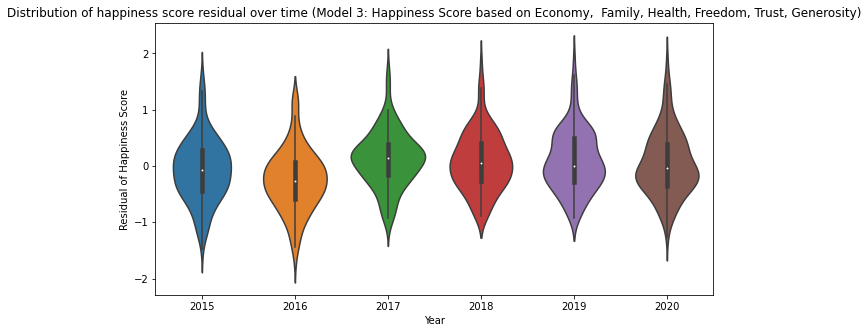

In [27]:
#### MODEL 3: PREDICT HAPPINESS SCORE BASED ON OTHER FACTORS #####

feature_names = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']

#Get X and Y axes
features_X = dataAll[feature_names]
happiness_Y = dataAll['Happiness Score']

# Linear regression
happiness_Y_predict, coeff, intercept = linear_reg (features_X, happiness_Y, feature_names)


# Add the residual column
dataAll['Happiness Residual 3'] = happiness_Y_predict - happiness_Y

#Plot the residual distribution over years
plt.figure(figsize=(10,5)) #Format figure size
sns.violinplot(x='Year', y='Happiness Residual 3', data=dataAll) \
    .set( xlabel="Year", ylabel="Residual of Happiness Score")
plt.title("Distribution of happiness score residual over time (Model 3: Happiness Score based on Economy,  Family, Health, Freedom, Trust, Generosity)")
plt.show()

The Mean Squared Error and R Squared Score of Model 3 have been improved from Model 2.
However, the Residual Plot shows that: Means of Residuals are not 0, Distribution of Residuals of Model 3 are not as normal as that of Model 2.

Conclustion: **Choose Model 2 (Predict Happiness Score based on Region) as a model for predicting happiness score.**

### ANALYZE HOW FACTORS THAT AFFECT HAPPINESS SCORE CHANGE OVER YEARS

## TODO: WRITE UP

In [28]:
feature_names = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']

def factors_affected_happiness_by_year(year):
    # Get year dataframe
    year_df = dataAll[dataAll["Year"] == year]
    
    #Get X and Y axes
    features_X = year_df[feature_names]
    happiness_Y = year_df['Happiness Score']
    
    linear_reg (features_X, happiness_Y, feature_names)
    
    
    

In [29]:
factors_affected_happiness_by_year(2015)


Mean squared error: 0.29
R squared score: 0.78
   Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                  0.860657  1.408892                  0.975309  1.333433   

   Trust (Government Corruption)  Generosity  Intercept  
0                       0.784538    0.388933   1.860185  


**Year 2015: Family > Freedom > Life Expectancy > Economy (GDP) > Government Trust > Generosity**

In [30]:
factors_affected_happiness_by_year(2016)


Mean squared error: 0.28
R squared score: 0.79
   Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                  0.721413  1.229754                  1.436403  1.513935   

   Trust (Government Corruption)  Generosity  Intercept  
0                       0.918927    0.159494   2.190294  


**Year 2016: Freedom > Life Expectancy > Family > Government Trust > Economy > Generosity**

In [31]:
factors_affected_happiness_by_year(2017)


Mean squared error: 0.23
R squared score: 0.81
   Economy (GDP per Capita)   Family  Health (Life Expectancy)   Freedom  \
0                  0.794919  1.14852                  1.330857  1.407979   

   Trust (Government Corruption)  Generosity  Intercept  
0                        0.95305    0.393118   1.684468  


**Year 2017: Freedom > Life Expectancy > Family > Government Trust > Economy > Generosity**

In [32]:
factors_affected_happiness_by_year(2018)


Mean squared error: 0.26
R squared score: 0.79
   Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                  0.888664  1.221054                  0.931914  1.355804   

   Trust (Government Corruption)  Generosity  Intercept  
0                       0.800946    0.463499   1.746957  


**Year 2018: Freedom > Family > Life Expectancy > Economy  > Government Trust > Generosity**

In [33]:
factors_affected_happiness_by_year(2019)


Mean squared error: 0.28
R squared score: 0.77
   Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                  0.766022  1.244737                  1.008123  1.407431   

   Trust (Government Corruption)  Generosity  Intercept  
0                       1.072692    0.406235   1.734016  


**Year 2019: Freedom > Family > Government Trust > Life Expectancy > Economy > Generosity**

In [34]:
factors_affected_happiness_by_year(2020)


Mean squared error: 0.31
R squared score: 0.75
   Economy (GDP per Capita)  Family  Health (Life Expectancy)   Freedom  \
0                  0.739118   1.153                  0.980704  1.482473   

   Trust (Government Corruption)  Generosity  Intercept  
0                       0.972943    0.620785   1.887211  


**Year 2020: Freedom > Family > Life Expectancy > Government Trust > Economy > Generosity**

## TODO: WRITE UP. AND HYPOTHESIS TESTING CONCLUSION

## 5. INSIGHT AND CONCLUSION: